This notebook is intended to be read after the notebook '2017-08-02-youtube-scrapes'. It uses the final output from this notebook to build the influencer network. The notebook is split into 2 sections:

* Build Bipartite Network of Channels and Videos.
* Build interaction Network

Please refer to the document: *2017-08-17-jupyter-noteboook.pdf*, for further details on the methodology.

In [2]:
# load output from previous notebook
%store -r channel_videos_comments

In [2]:
channels = list(channel_videos_comments)

In [3]:
import networkx as nx
from networkx.algorithms import bipartite

%pylab inline 
figsize(16,9)

#B = nx.Graph()

Populating the interactive namespace from numpy and matplotlib


# Build Bipartite Network of Channels and Videos.

### Obtain a list of all comments made on all videos amongst subsetted users

In [4]:
videosandcomments = []
for key in channels:
    videos = channel_videos_comments[key]
    for i in list(videos.keys()):
        for j in range(len(videos[i])):
            try:
                y = (i, videos[i][j][1],videos[i][j][0], key)
            except:
                y = (0,0,0,0)
            videosandcomments.append(y)
len(videosandcomments)
#channel_videos_comments['UCFEjAGTnebT3TDeYtdW9-sQ']

1268788

### Create Network containing subsetted influential channels and videos and add edge for comments on videos made by channels (other than own videos):

In [5]:
# add channels as nodes with labels
B = nx.Graph()
B.add_nodes_from([(channels[i], {'label':i}) for i in range(len(list(channels)))])
labelchannel = nx.get_node_attributes(B, 'label')

# add videos as nodes with corresponding channel labels
B.add_nodes_from( [(list(channel_videos_comments[key].keys())[i], {'label': labelchannel[key]}) 
                   for key in channels for i in range(len(list(channel_videos_comments[key].keys())))] )
labelall = nx.get_node_attributes(B, 'label')

# add edges based on commenting on videos (excluding own comments)
for i in videosandcomments:
    if i[1] != i[3]:
        if B.has_node(i[1]):
            B.add_edge(i[1], i[0])
        
len(B.edges())

1948

### Create nodedict
$nodedict[key] = [channel, videos,...,]$, for key $\in [0:|U_i|]$, where $|U_i|$ is total # of channels in network.

In [6]:
# create array of channel+videos\

nodedict = {}
for i in range(len(labelchannel)):
    s = []
    for key in labelall:
        if labelall[key] == i:
            s.append(key)
    nodedict[i] = s

### Plot Network 

(-1.2099994442287882,
 1.2099999471891607,
 -1.2099987916394217,
 1.2099887324484133)

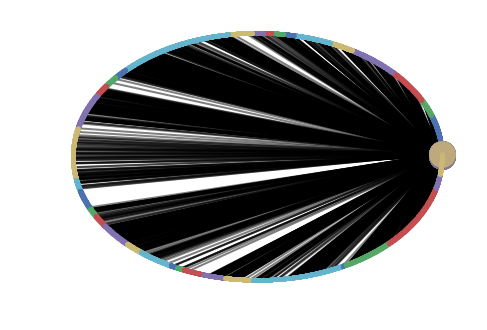

In [7]:
# PLOT GRAPH WITH COLOURING PER CHANNEL&VIDEOS
figsize(16,9)

# create colour palette for each channel
import seaborn as sns
colorpalette = sns.color_palette("deep", len(labelchannel))

# plot each channel and associated videos a particular colour
#pos=nx.spring_layout(B)
pos=nx.shell_layout(B)
#pos=nx.fruchterman_reingold_layout(B)
#pos=nx.spectral_layout(B)
for i in range(len(labelchannel)):
    nx.draw_networkx_nodes(B, pos, nodedict[i], node_color=colorpalette[i], node_size=20, alpha=0.8)
# add a cross to the channels to highlight different from videos
    nx.draw_networkx_nodes(B, pos, [nodedict[i][0]], node_shape='o',node_size = 700, node_color=colorpalette[i], alpha=0.8)
# draw edges in network
nx.draw_networkx_edges(B,pos,width=2.0,alpha=0.5)
plt.axis('off')
#plt.savefig("londoncomments.png") 
#nx.draw(B, pos=pos)

### Plot Network Bipartite

(0.98628788688054214, 1.1137121131194581, -53550.0, 563550.0)

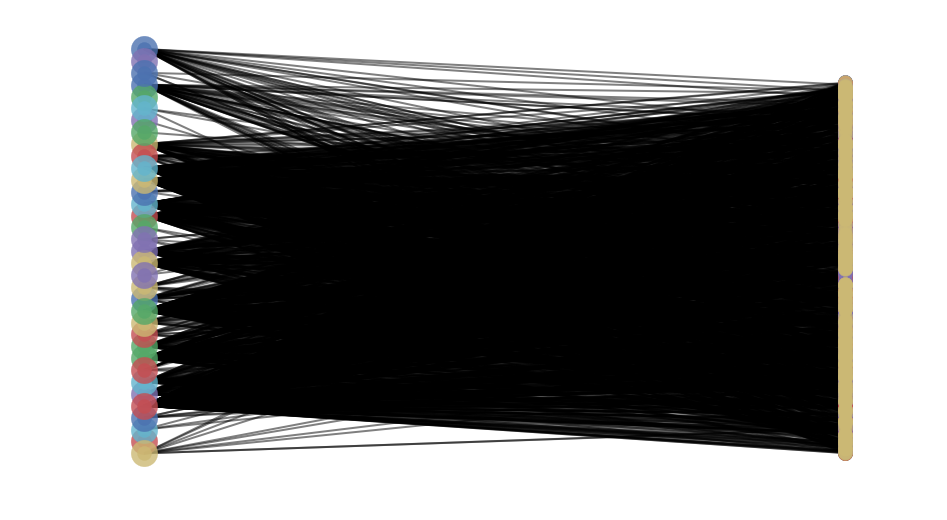

In [8]:
# PLOT GRAPH WITH COLOURING PER CHANNEL&VIDEOS
figsize(16,9)

# create colour palette for each channel
import seaborn as sns
colorpalette = sns.color_palette("deep", len(labelchannel))

#### code to plot bipartite - not looking very good
bottom_nodes = set(labelchannel.keys())
top_nodes = set(labelall.keys()) - set(labelchannel.keys())
pos = dict()
pos.update( (n, (1, i*15000)) for i, n in enumerate(bottom_nodes) ) # put nodes from X at x=1
pos.update( (n, (1.1, i*50)) for i, n in enumerate(top_nodes) ) # put nodes from Y at x=2
####################################################

# plot each channel and associated videos a particular colour
#pos=nx.spring_layout(B) 
for i in range(len(labelchannel)):
    nx.draw_networkx_nodes(B, pos, nodedict[i], node_color=colorpalette[i], node_size=200, alpha=0.8)
# add a cross to the channels to highlight different from videos
    nx.draw_networkx_nodes(B, pos, [nodedict[i][0]], node_shape='o',node_size = 700, node_color=colorpalette[i], alpha=0.8)
# draw edges in network
nx.draw_networkx_edges(B,pos,width=2.0,alpha=0.5)
plt.axis('off')
#nx.draw(B, pos=pos)

# Build Interaction Network

### Test Example (as per 2017-08-17-jupyter-noteboook)

In [9]:
nodedictII = {0: ['0', 'a', 'b', 'c'], 1: ['1', 'd', 'e'], 2: ['2', 'f', 'g']}
test = nx.Graph()
test.add_edges_from([('0', 'd'), ('0', 'e'), ('1', 'c'), ('1','f'),('2', 'e')])
#pos=nx.shell_layout(test)
#nx.draw_networkx_labels(test, pos)
#nx.draw_networkx_edges(test,pos,width=2.0,alpha=0.5)
widthlist = []
I = nx.DiGraph()
for i in nodedictII.keys():
    for j in nodedictII.keys():
        if i == j:
            pass
        else: 
            x = nodedictII[i][0]
            y = nodedictII[j][0]
            xedges = [test.edges(x)[i][1] for i in range(len(test.edges(x)))]
            yitems = nodedictII[j][1:]
            eiejk = set(xedges) & set(yitems)
            if len(xedges) == 0:
                w = 0
            else:
                w = len(eiejk)**2/(len(xedges)*len(yitems))
            #print (w)
            widthlist.append(w*10)
            I.add_edge(x, y, weight = w)
print (nx.adjacency_matrix(I))

  (0, 1)	1.0
  (0, 2)	0.0
  (1, 0)	0.166666666667
  (1, 2)	0.25
  (2, 0)	0.0
  (2, 1)	0.5


### Interaction Network of YouTube users

In [10]:
widthlist = []
I = nx.DiGraph()
for i in nodedict.keys():
    for j in nodedict.keys():
        if i == j:
            pass
        else: 
            x = nodedict[i][0]
            y = nodedict[j][0]
            xedges = [B.edges(x)[i][1] for i in range(len(B.edges(x)))]
            yitems = nodedict[j][1:]
            eiejk = set(xedges) & set(yitems)
            if len(xedges) == 0:
                w = 0
            else:
                w = len(eiejk)**2/(len(xedges)*len(yitems))
            #print (w)
            widthlist.append(w*10)
            I.add_edge(x, y, weight = w)
A = nx.adj_matrix(I)

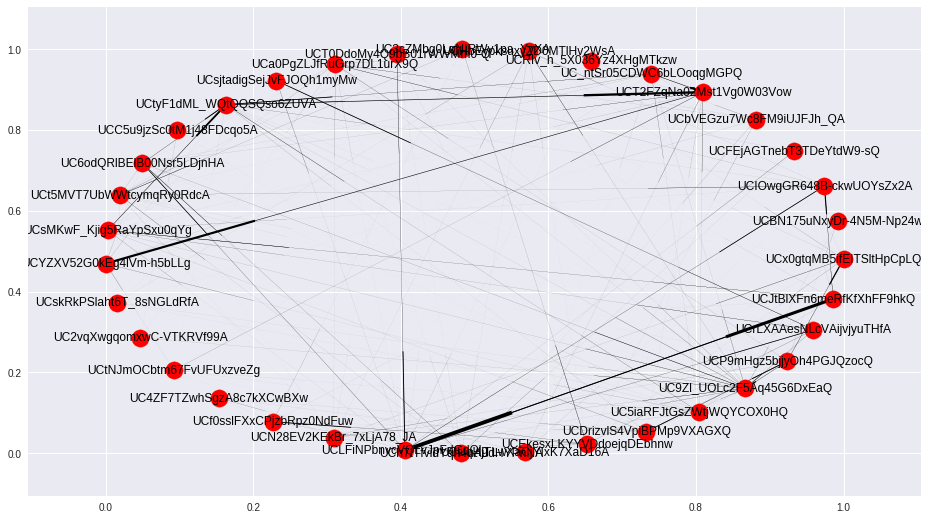

In [11]:
nx.draw_networkx(I, width = widthlist, arrows=1)

In [4]:
import pandas as pd

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb76803e9b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb768096208>], dtype=object)

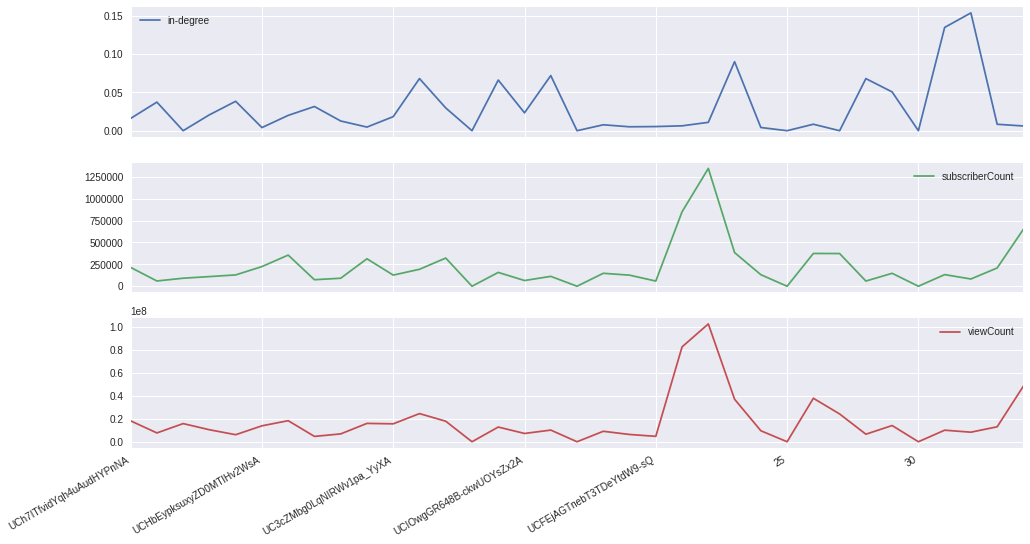

In [13]:
# plot to compare in-degree with user statistics
indegree = sum(A, 1)
outdegree = sum(A, 0)
%store -r influencerinfo
compare = {}
for i in nodedict.keys():
    try:
        channel = nodedict[i][0]
        compare[channel] = [float(indegree[i]), influencerinfo[channel][0], influencerinfo[channel][4], influencerinfo[channel][6]]
    except:
        compare[i] = [0, 0, 0, 0]
df = pd.DataFrame(compare).transpose()
df.columns = ['in-degree', 'name', 'subscriberCount', 'viewCount']

df.plot(kind = 'line', subplots = True)

<font color="red">Plots show that in-degree is not strongly correlated with statisitics! good news, the interaction matrix could provide us with information not readily available (i.e. those influential users are not simply the ones with the most videos/subscribers/views... now, what makes these users influential?

### Normalise

In [168]:
#from sklearn.preprocessing import normalize
#from scipy import sparse

In [118]:
#adj = A.todense()
#
#adjnorm = normalize(adj, norm='l2', axis = 1)
#widthlengthnorm = adjnorm.reshape(1225)
#
#Inorm = nx.from_numpy_matrix(adjnorm, create_using = nx.DiGraph())
#nx.draw_networkx(Inorm, width = widthlengthnorm, arrows=1)

In [5]:
df = pd.DataFrame(channel_videos_comments)

In [6]:
df

,UC2vqXwgqomxwC-VTKRVf99A,UC3cZMbg0LqNIRWv1pa_YyXA,UC4ZF7TZwhSgzA8c7kXCwBXw,UC5iaRFJtGsZWtjWQYCOX0HQ,UC6odQRlBElB00Nsr5LDjnHA,UC9Zl_UOLc2F5Aq45G6DxEaQ,UCBN175uNxyDr-4N5M-Np24w,UCC5u9jzSc0tM1j48FDcqo5A,UCDrizvlS4VpiBPMp9VXAGXQ,UCEkesxLKYYVDdoejqDEbhnw,...,UCf0sslFXxCPjzbRpz0NdFuw,UCh7ITfvidYqh4uAudHYPnNA,UCrLXAAesNLcVAijvjyuTHfA,UCsMKwF_Kjig5RaYpSxu0qYg,UCsjtadigSejJvFJOQh1myMw,UCskRkPSlaht6T_8sNGLdRfA,UCt5MVT7UbWWtcymqRy0RdcA,UCtNJmOCbtm67FvUFUxzveZg,UCtyF1dML_WQtQQSQso6ZUVA,UCx0gtqMB5ifEITSltHpCpLQ
--6TeUc6WTM,NaN,NaN,NaN,NaN,NaN,"[(z12ivbmpoxbbe3ghm04cdpgg2pzftbqocos0k, UC9Zl...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--CApeHk5l0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--DFHcEpVhQ,"[(z12nd5cqlyv3zrfti234gpopyoalub0u2, UCnr25Smo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0OfZgl9r-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"[(z13oi3bpctetsrxhu04cctiqzurld3sqqjw, UCrNOff...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0ZTwxK8TdQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0fMdxlaJg4,NaN,NaN,NaN,NaN,"[(z13eunh4bsaqf3qqg04cdnmgwuifdxmam5o, UCfGpKA...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0wr-zVS1I4,NaN,NaN,NaN,NaN,"[(z12lcjrp2lqcwnptk23zuhnh5wnwspqk2, UCnl2qo3j...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0z11CIL3-Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0zise8j5_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1XjkKEqvMw,NaN,NaN,NaN,NaN,"[(z12yjjeglsyefja0i23gibgaqp34zdttp, UCKf-u0LC...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
s=0
for key in channel_videos_comments:
    s += len(channel_videos_comments[key])

In [9]:
df.to_json('channel_videos_comments')